In [18]:
import pandas as pd
import requests
import gzip
import shutil
import os

os.makedirs('data', exist_ok=True)
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"
compressed_file = "data/kddcup.data.gz"
data_file = "data/kddcup.data.csv"

response = requests.get(url, stream=True)
with open(compressed_file, 'wb') as f:
    f.write(response.content)

with gzip.open(compressed_file, 'rb') as f_in:
    with open(data_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [1]:
import pandas as pd
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]
data_file = 'data/kddcup.data.csv'
df = pd.read_csv(data_file, header=None, names=column_names)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

dst_col_names = [col for col in df.columns if col.startswith('dst')]
dst_col_names.append('label')
dst_features =df.loc[:, dst_col_names]
dst_features.head()

,dst_bytes,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,45076,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,4528,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,1228,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,2032,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,486,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [40]:
counter=0
for col in df.columns:
    nulls = df[col].isnull().sum()
    if nulls:
        print(col, nulls)
    else:
        counter+=1
print(counter, 'columns passed!')

42 columns passed!


**Rows to remove**
* `dst_bytes` > 0.2e9: Because there are 3 extreme outliers above 0.2e9, checked using `sns.boxplot()`.

**TO DO**
* Classify features as Ordinal, Nominal, Continuous
* Check consistency in all columns (outliers and stuff)
* Visualize and find correlations

In [52]:
for col in ['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins']:
    print(df[col].value_counts())

land
0    4898403
1         28
Name: count, dtype: int64
wrong_fragment
0    4897193
3        970
1        268
Name: count, dtype: int64
urgent
0     4898415
1           9
2           4
5           1
3           1
14          1
Name: count, dtype: int64
hot
0     4890163
2        2647
1        1393
4         942
6         868
5         339
30        281
19        281
28        279
14        270
18        269
22        255
24        249
3          88
7          27
20         17
9          11
15          8
17          7
11          7
10          5
16          4
12          4
21          4
13          4
8           3
44          2
25          2
77          1
33          1
Name: count, dtype: int64
num_failed_logins
0    4898306
1        107
2          9
3          5
4          3
5          1
Name: count, dtype: int64


<Axes: ylabel='duration'>

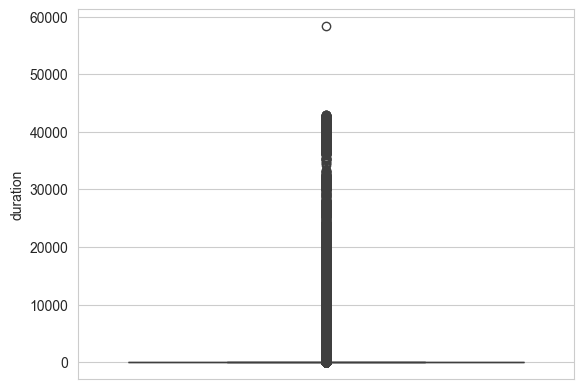

In [41]:
sns.boxplot(df['duration'])